     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 926.9 kB/s eta 0:00:0000:0100:01


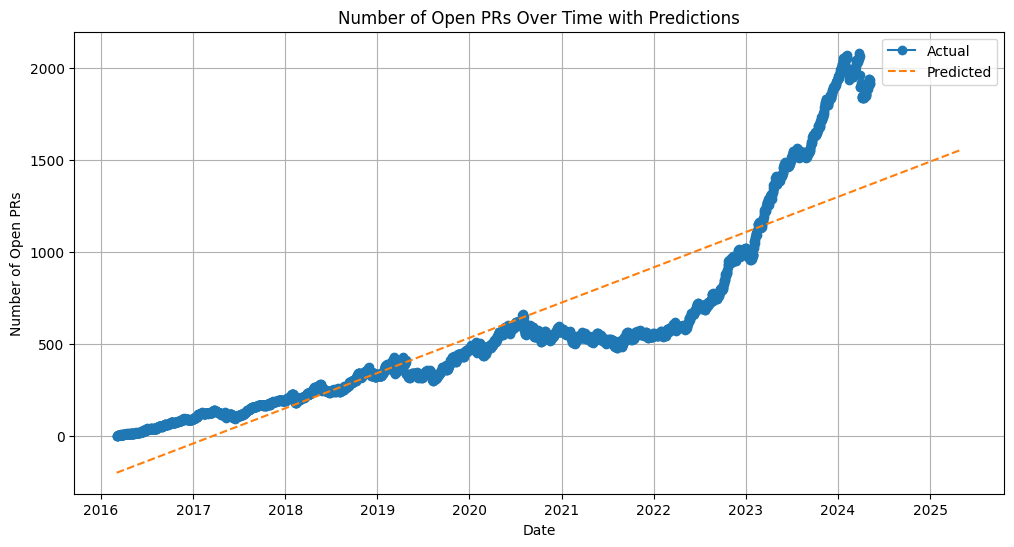

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("project-8400-GitHub-20240509T181710.csv")

df['created_at'] = pd.to_datetime(df['created_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

date_range = pd.date_range(
    start=df['created_at'].min(), end=df['closed_at'].max())

open_prs = pd.DataFrame(date_range, columns=['date'])
open_prs['open_count'] = 0

for _, row in df.iterrows():
    open_prs.loc[(open_prs['date'] >= row['created_at']) & ((
        open_prs['date'] <= row['closed_at']) | (row['state'] == 'open')), 'open_count'] += 1
    
open_prs['date_ordinal'] = open_prs['date'].map(pd.Timestamp.toordinal)

X = open_prs['date_ordinal'].values.reshape(-1, 1)
y = open_prs['open_count'].values
model = LinearRegression()
model.fit(X, y)

future_dates = pd.date_range(
    start=open_prs['date'].max() + pd.Timedelta(days=1), periods=365)
future_dates_ordinal = future_dates.map(
    pd.Timestamp.toordinal).values.reshape(-1, 1)

all_dates = np.concatenate(
    [open_prs['date_ordinal'].values, future_dates_ordinal.flatten()])
all_dates_df = pd.DataFrame(all_dates, columns=['date_ordinal'])
all_dates_df['date'] = all_dates_df['date_ordinal'].map(
    lambda x: pd.Timestamp.fromordinal(int(x)))

all_predictions = model.predict(
    all_dates_df['date_ordinal'].values.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(open_prs['date'], open_prs['open_count'], marker='o', label='Actual')
plt.plot(all_dates_df['date'], all_predictions,
         linestyle='--', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Number of Open PRs')
plt.title('Number of Open PRs Over Time with Predictions')
plt.legend()
plt.grid(True)
plt.show()
